In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#-p flag ensures that the command creates parent directories as needed,
#and it won't throw an error if the directory already exists.

In [2]:
!kaggle datasets download -d emmarex/plantdisease

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
plantdisease.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/plantdisease.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16

In [5]:
input_shape = (150, 150, 3)
input_tensor = keras.Input(shape=input_shape)
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_tensor=input_tensor
    )

In [6]:
conv_base.trainable=True
set_trainable=False
for layer in conv_base.layers:
  if layer.name=='block5_conv1':
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False

for layers in conv_base.layers:
  print(layers.name,layers.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [7]:
conv_base.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [8]:
x = conv_base.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(15, activation='softmax')(x)

model = keras.Model(inputs=input_tensor, outputs=x)

print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 16,815,951 (64.15 MB)

 Trainable params: 9,180,687 (35.02 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

None


In [9]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
original_data_dir = '/content/PlantVillage'
base_dir = '/content/'

# Create directories for train, validation, and test sets
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Set the split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# List of class folders
classes = [
 'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy',
 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy',
 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight',
 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy'
]

# Splitting the data
for cls in classes:
    class_dir = os.path.join(original_data_dir, cls)
    images = os.listdir(class_dir)

    # Split the images into train, val, and test
    train_images, temp_images = train_test_split(images, train_size=train_ratio, random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=test_ratio/(test_ratio + val_ratio), random_state=42)

    # Move images to train folder
    train_class_dir = os.path.join(train_dir, cls)
    os.makedirs(train_class_dir, exist_ok=True)
    for img in train_images:
        shutil.move(os.path.join(class_dir, img), os.path.join(train_class_dir, img))

    # Move images to validation folder
    val_class_dir = os.path.join(val_dir, cls)
    os.makedirs(val_class_dir, exist_ok=True)
    for img in val_images:
        shutil.move(os.path.join(class_dir, img), os.path.join(val_class_dir, img))

    # Move images to test folder
    test_class_dir = os.path.join(test_dir, cls)
    os.makedirs(test_class_dir, exist_ok=True)
    for img in test_images:
        shutil.move(os.path.join(class_dir, img), os.path.join(test_class_dir, img))

print("Data splitting is complete.")


Data splitting is complete.


In [10]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)
test_ds=keras.utils.image_dataset_from_directory(
    directory='test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)
val_ds=keras.utils.image_dataset_from_directory(
    directory='val',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)

Found 14441 files belonging to 15 classes.
Found 3100 files belonging to 15 classes.
Found 3097 files belonging to 15 classes.


In [11]:
def process(image, label):
  image = tensorflow.cast(image/255.0, tensorflow.float32)
  return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)
val_ds = val_ds.map(process)

In [14]:
# If your labels are integers (0 to 14), use this:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_ds, epochs=5, validation_data=val_ds)


Epoch 1/5
452/452 ━━━━━━━━━━━━━━━━━━━━ 68s 126ms/step - accuracy: 0.3602 - loss: 1.9252 - val_accuracy: 0.7546 - val_loss: 0.7060
Epoch 2/5
452/452 ━━━━━━━━━━━━━━━━━━━━ 61s 100ms/step - accuracy: 0.8011 - loss: 0.5904 - val_accuracy: 0.8373 - val_loss: 0.4767
Epoch 3/5
452/452 ━━━━━━━━━━━━━━━━━━━━ 86s 108ms/step - accuracy: 0.8755 - loss: 0.3708 - val_accuracy: 0.8589 - val_loss: 0.4218
Epoch 4/5
452/452 ━━━━━━━━━━━━━━━━━━━━ 50s 110ms/step - accuracy: 0.9159 - loss: 0.2446 - val_accuracy: 0.8702 - val_loss: 0.4193
Epoch 5/5
452/452 ━━━━━━━━━━━━━━━━━━━━ 50s 110ms/step - accuracy: 0.9281 - loss: 0.2065 - val_accuracy: 0.8993 - val_loss: 0.3140


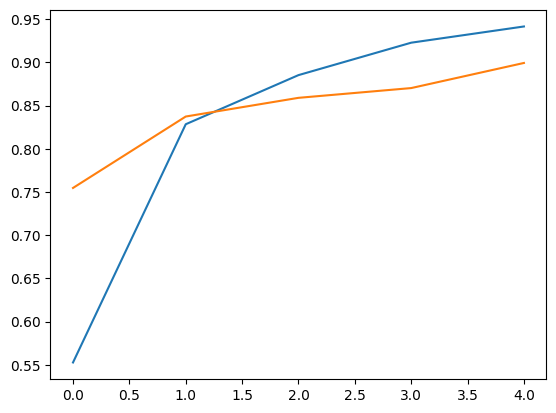

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

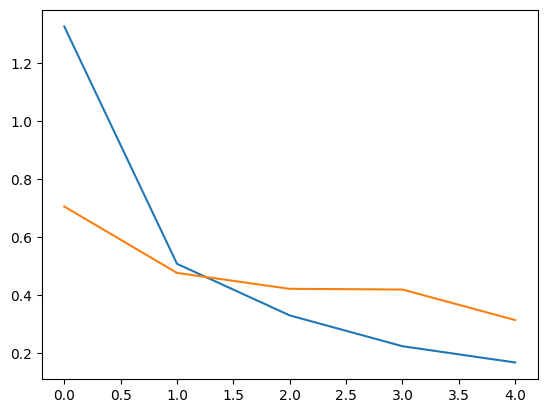

In [16]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')

In [19]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = '/content/0031da2a-8edd-468f-a8b1-106657717a32___RS_HL 0105.JPG'  # Replace with your image path
img = image.load_img(img_path, target_size=(150, 150))  # Resize to 150x150
img_array = image.img_to_array(img)  # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image (same as during training)

# Make prediction
prediction = model.predict(img_array)

# List of class names
class_names = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight',
               'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot',
               'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold',
               'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite',
               'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
               'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']

# Find the index of the class with the highest probability
predicted_index = np.argmax(prediction[0])

# Get the predicted class name
predicted_class = class_names[predicted_index]

# Print the predicted class
print(f"Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Tomato_healthy


In [20]:
# Save the entire model to a single file
model.save('model.h5')

In [21]:
from tensorflow.keras.models import load_model
loaded_model = load_model('model.h5')
